In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table as tbl
%matplotlib notebook

In [2]:
def lightcurve(filename):
    source = tbl.read(filename, format = 'ipac')
    nOid = np.unique(source['oid'])
    nFid = np.unique(source['fid'])
    
    plt.errorbar(source['obsmjd'], source['mag_autocorr'], yerr = source['magerr_auto'], fmt = 'k+', markersize = 5)
    
    fig = plt.figure(figsize = (20, 20))
    
    for i in range(len(nOid)):
        
        want = (source['oid'] == nOid[i])
        green = (source['fid'] == 1)
        Red = (source['fid'] == 2)
        filg = np.logical_and(want, green)
        filR = np.logical_and(want, Red)
        
        ax = fig.add_subplot(len(nOid), len(nFid) + 1, 3*i + 1)
        ax.errorbar(source['obsmjd'][want], source['mag_autocorr'][want], yerr = source['magerr_auto'][want], fmt = 'k+', markersize = 5)
        ax.set_ylabel('Magnitude')
        ax.set_xlabel('Time')
        ax.set_title('Total lightcurve of %d' %nOid[i])
        
        ax1 = fig.add_subplot(len(nOid), len(nFid) + 1, 3*i + 2)
        ax1.errorbar(source['obsmjd'][filg], source['mag_autocorr'][filg], yerr = source['magerr_auto'][filg], fmt = 'go', markersize = 3, label = 'Green filter')
        ax1.set_ylabel('Magnitude')
        ax1.set_xlabel('Time')
        ax1.set_title('Lightcurve of %d in green filter' %nOid[i])
                
        ax2 = fig.add_subplot(len(nOid), len(nFid) + 1, 3*i + 3) 
        ax2.errorbar(source['obsmjd'][filR], source['mag_autocorr'][filR], yerr = source['magerr_auto'][filR], fmt = 'ro', markersize = 3, label = 'Red filter')
        ax2.set_ylabel('Magnitude')
        ax2.set_xlabel('Time')
        ax2.set_title('Lightcurve of %d in Red filter' %nOid[i])
        
        plt.tight_layout()
        
        if (all(filg == False)):
            print('Warning! No observations in green filter for object %d' %nOid[i])
            
        elif (all(filR == False)):
            print('Warning! No observations in Red filter for object %d' %nOid[i])


<IPython.core.display.Javascript object>


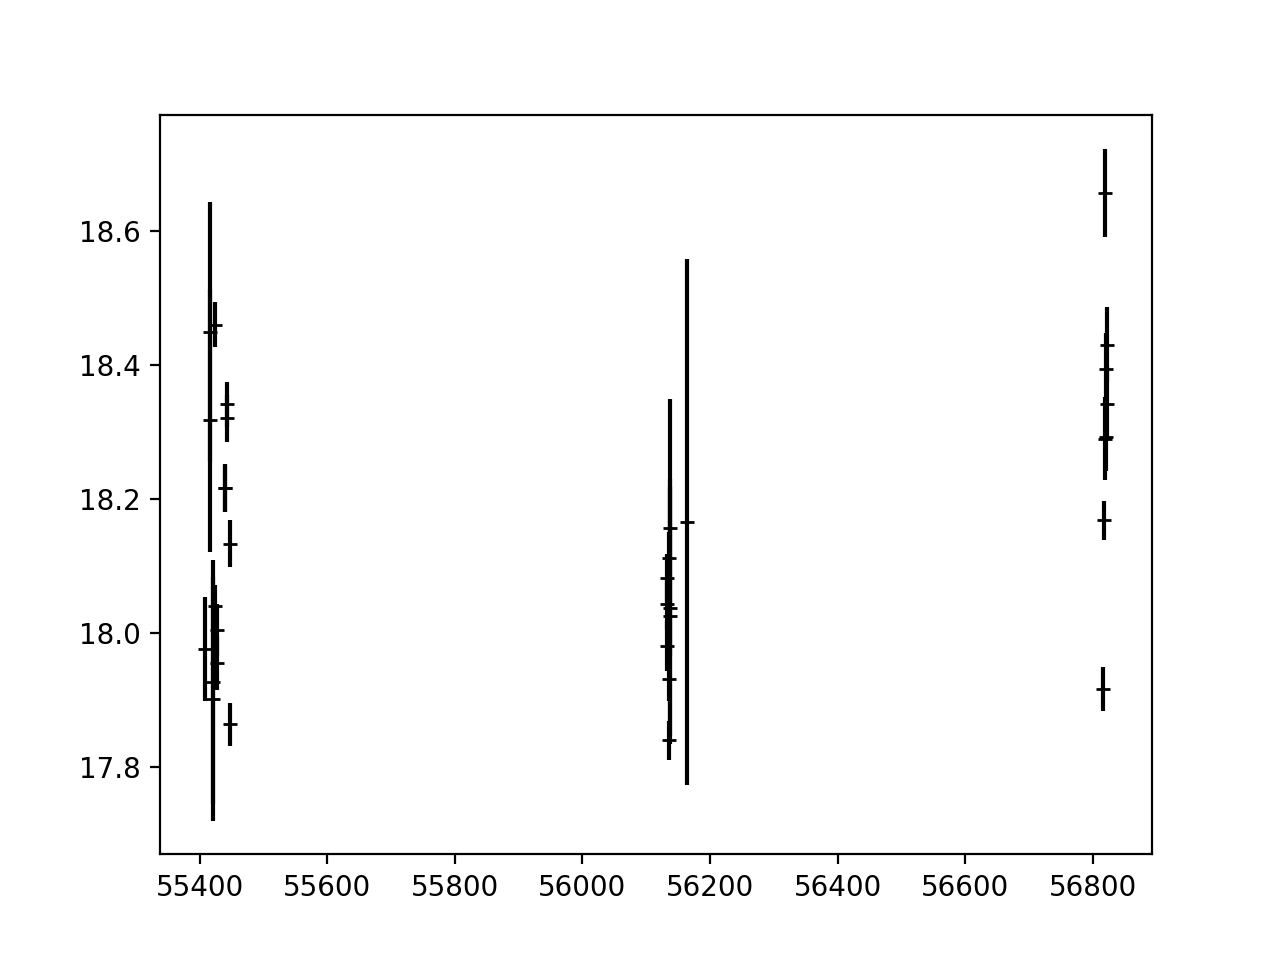

<IPython.core.display.Javascript object>


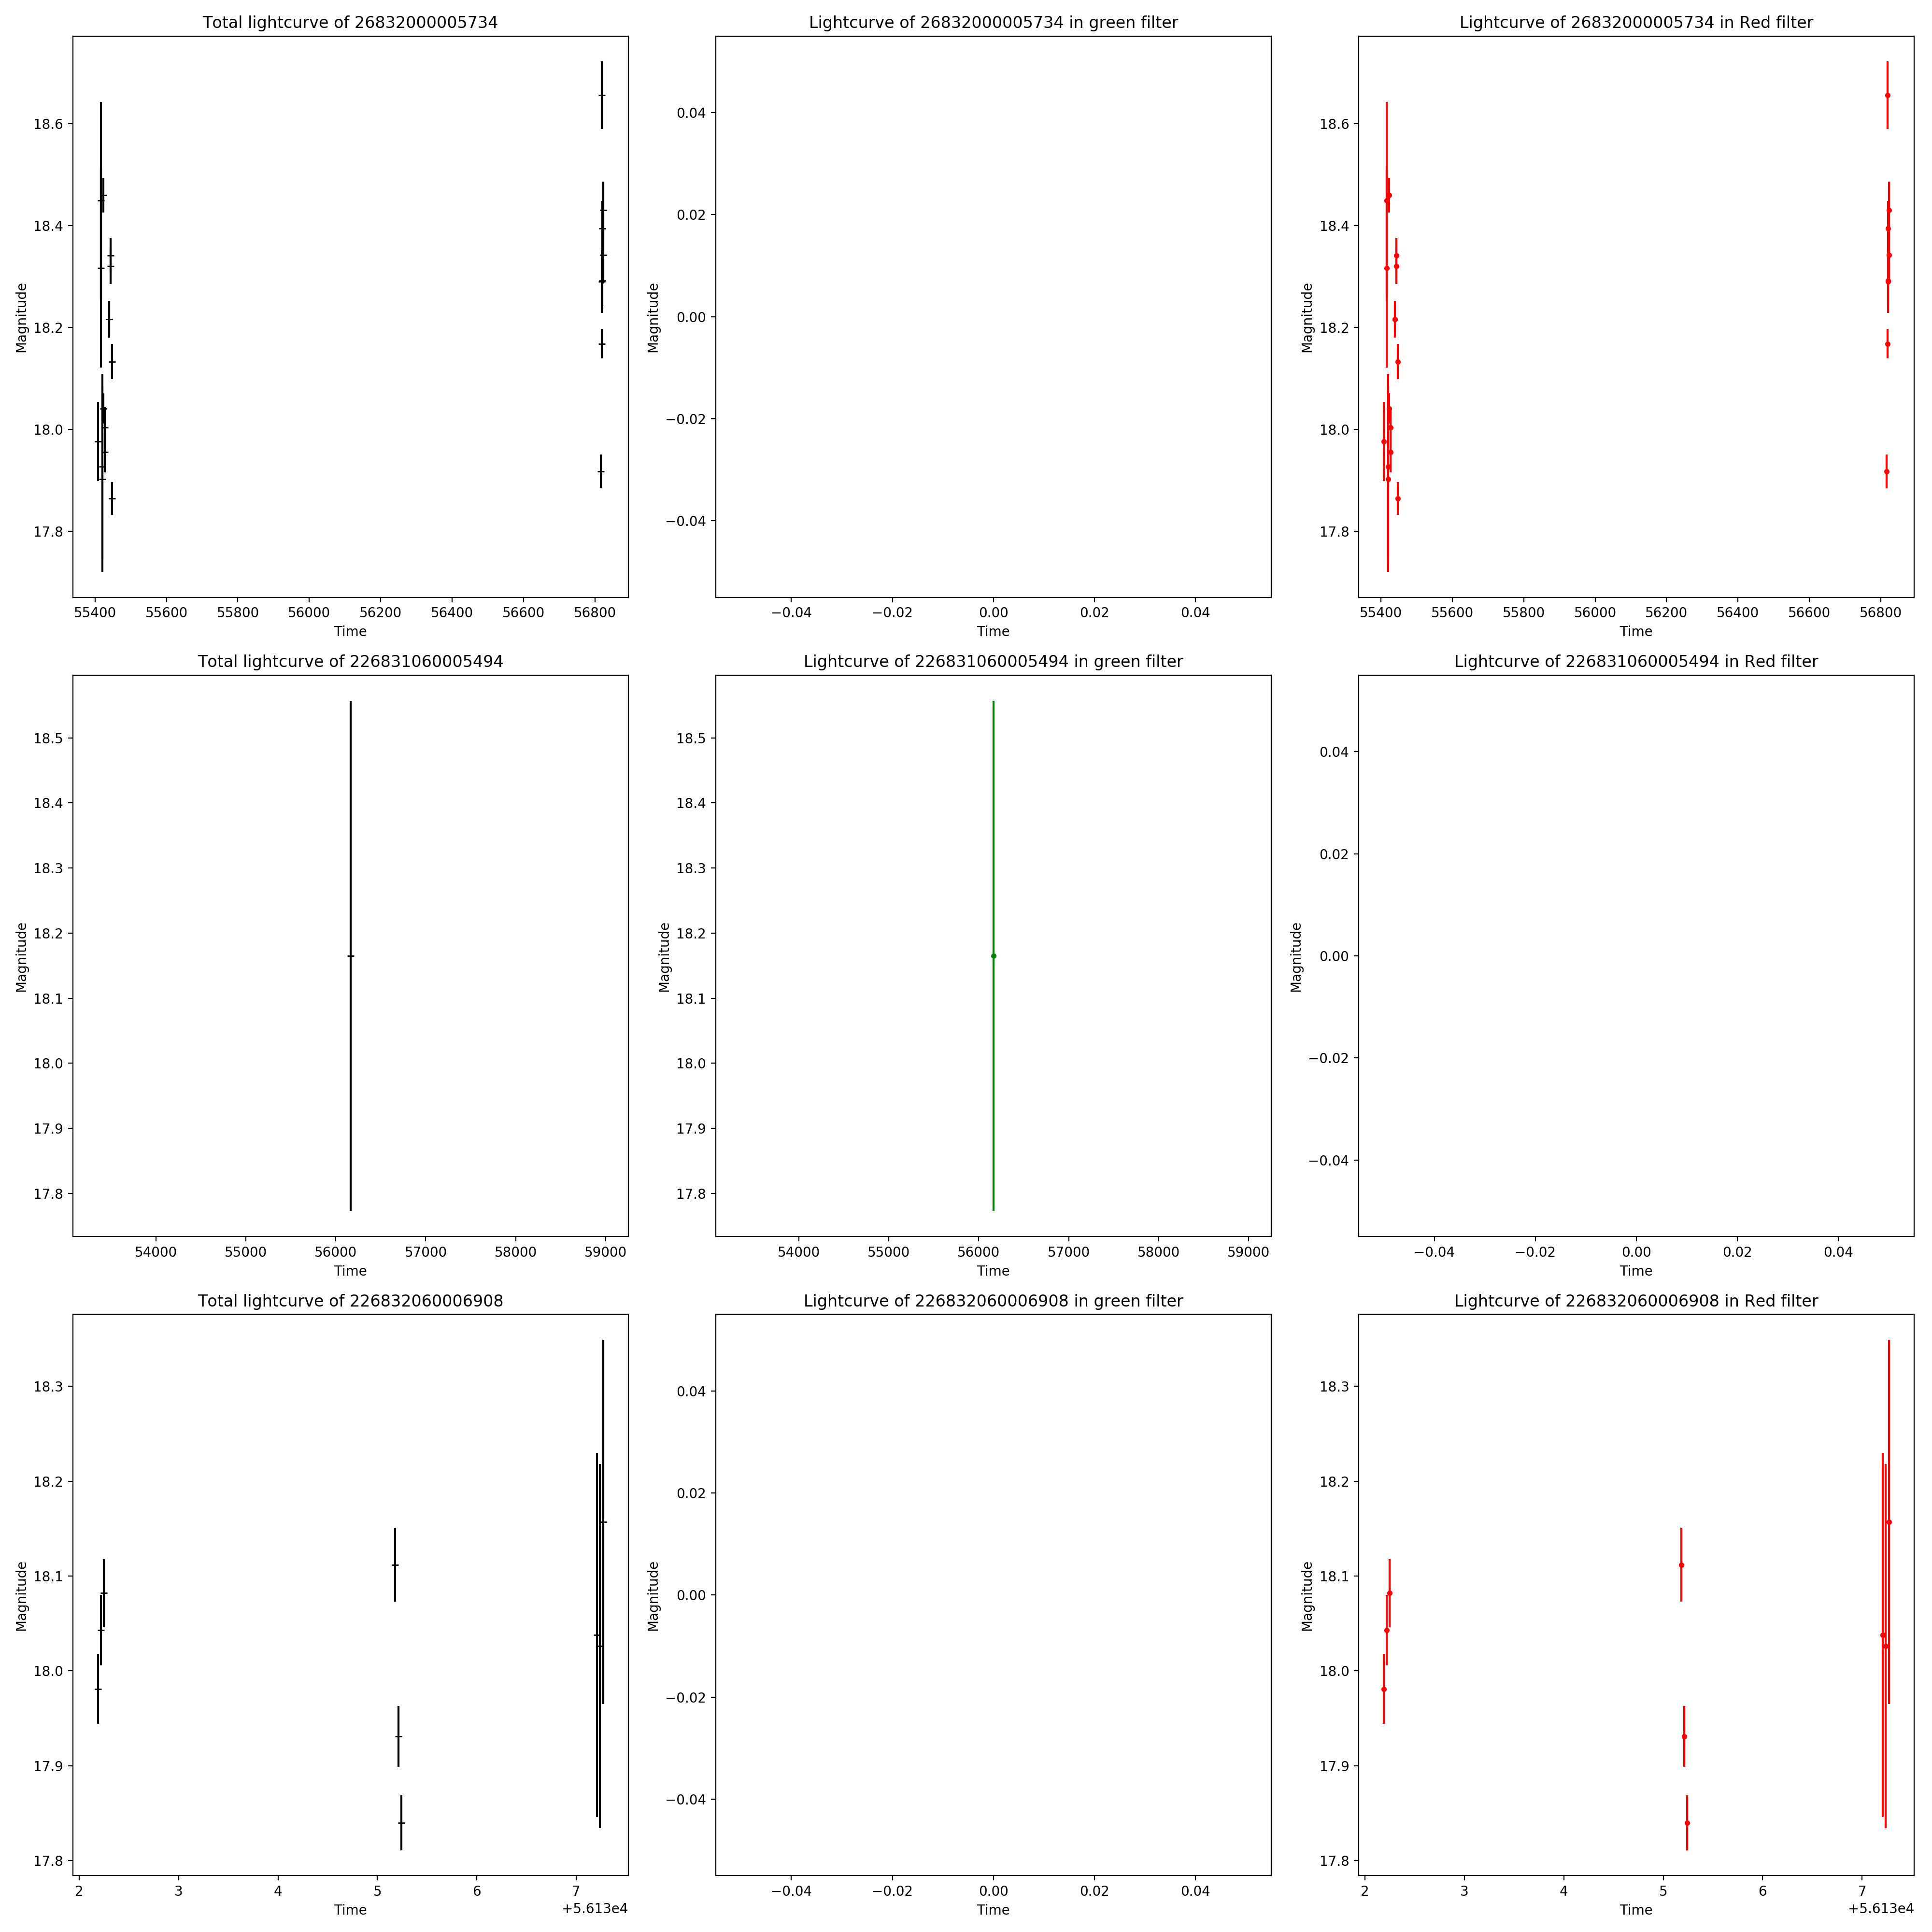

Warning! No observations in green filter for object 26832000005734
Warning! No observations in Red filter for object 226831060005494
Warning! No observations in green filter for object 226832060006908


In [4]:
lightcurve('source2.tbl')